## Projektna naloga

Podatkovno rudarjenje, naloga, `DATUM`  
**`Denis Popović`**

### Podatki

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

description = pd.read_csv("Data/steam_description_data.csv")
media = pd.read_csv("Data/steam_media_data.csv")
requirements = pd.read_csv("Data/steam_requirements_data.csv")
support = pd.read_csv("Data/steam_support_info.csv")
steam = pd.read_csv("Data/steam.csv")
tag = pd.read_csv("Data/steamspy_tag_data.csv")

## Najbolj popularni developerji ali podobne zanimivosti

`Najbolj popularni developerji so tisti, ki imajo fanbase največji (število prodanih kopij vseh njihovih iger). Tuki ne potrebujemo pregledovati če imajo popularne igre ali ne, saj se v gaming industriji veliko krat zgodi to, da developerji imajo tako dobre kot tudi slabe igre. Tuki je važno da jih ljudi poznajo oz. da posedujejo njihovo igro. Kar je lahko tuki problem, je ta da eni developerji imajo več iger kot drugi developerji in se lahko zgodi to, da npr.: ena oseba ima več iger od istega developerja in bomo isto osebo šteli večkrat. Če pa na problem pogledamo drugače nas to ne moti, saj developerjem, ki na vsakih par let izdajajo igre so bolj popularni in se bolj zapomnijo ljudem.`

In [2]:
import re

def getOwners(s):
    t = s.split("-")
    lowerBound = int(t[0])
    upperBound = int(t[1])
    return (lowerBound+upperBound)/2

def getYear(s):
    return int(s.split("-")[0])
    
def getName(s):
    return re.sub("\s.Linux.|\s.Mac.","",s)

In [3]:
def getDevelopers(year,top):
    devels = dict()
    for release_date, devel, owners, price in steam[["release_date","developer","owners","price"]].values:
        for n in devel.split(";"):
            name = getName(n)
            devels.setdefault(name,[0,0,False,0,0])
            devels[name][0] += getOwners(owners)
            devels[name][1] += 1
            if(float(price) == 0.0): devels[name][3] += 1
            else: devels[name][4] += 1
            if(year <= getYear(release_date)): devels[name][2]= True
    
    devels = dict(sorted(devels.items(), key=lambda k: k[1][0], reverse=True))
    devels_top = dict()
    i = 0
    print("Top %d najbolj popularnih ravzijalcev\n"%top)
    for name, value in devels.items():
        if(i >= top): break
        if(value[2]):
            print(name)
            devels_top[name] = value
        i += 1 
    return devels_top

In [4]:
devels = getDevelopers(2013,15)

Top 15 najbolj popularnih ravzijalcev

Valve
Feral Interactive
Hidden Path Entertainment
PUBG Corporation
Aspyr
Digital Extremes
Bethesda Game Studios
Smartly Dressed Games
Firaxis Games
Gearbox Software
Ubisoft Montreal
Relic Entertainment
Facepunch Studios
Avalanche Studios
CREATIVE ASSEMBLY


`Z naslednjimi vizualizacijami bmo pogledali zakaj so ti developerji popularni`

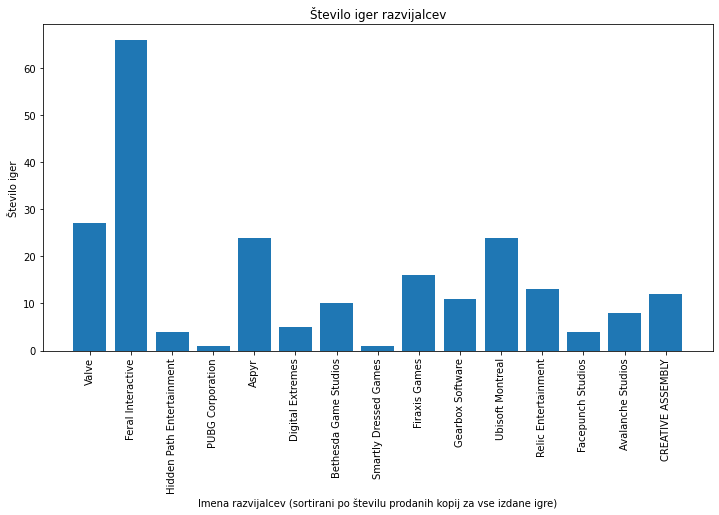

In [5]:
games = []
for v in devels.values():
    games.append(v[1])

plt.figure(figsize=(12,6))
plt.bar(devels.keys(),games)
plt.xticks(range(len(devels.keys())), devels.keys(), rotation=90)
plt.xlabel("Imena razvijalcev (sortirani po številu prodanih kopij za vse izdane igre)")
plt.ylabel("Število iger")
plt.title("Število iger razvijalcev")
plt.show()

`Že iz prvega grafa vidimo kako nekateri podatki iztopajo (Feral Interactive, PUBG Corporation, Smartly Dressed Games)`

In [6]:
develsByNumGames = dict(sorted(devels.items(), key=lambda k: k[1][1], reverse=True))
free = []
paid = []
for v in develsByNumGames.values():
    free.append(v[3])
    paid.append(v[4])


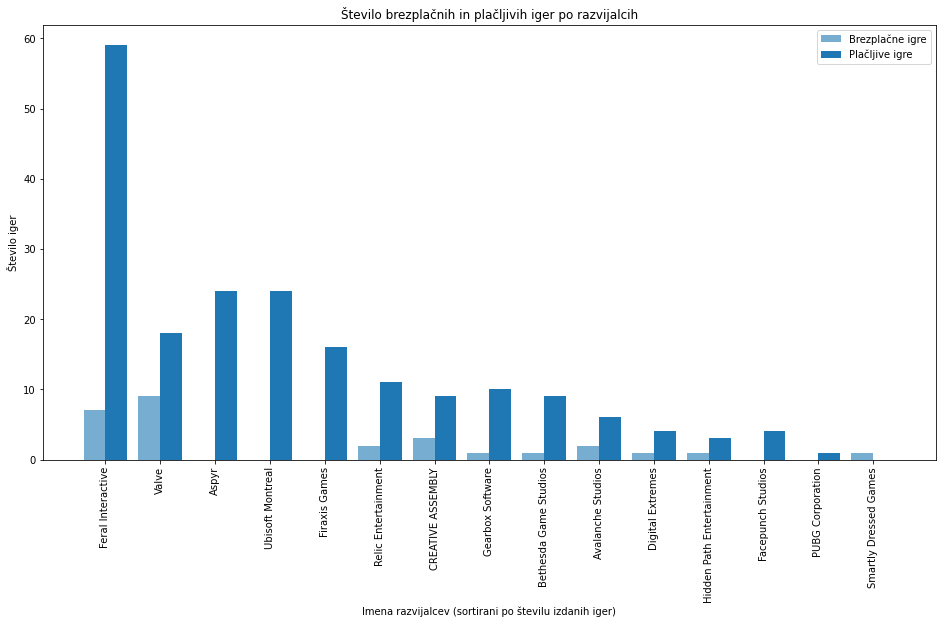

In [7]:
plt.figure(figsize=(16,8),facecolor='w')
plt.bar(np.arange(len(develsByNumGames.keys()))-0.2, free, width=0.4, color="tab:blue", alpha=0.6, align="center", label="Brezplačne igre")
plt.bar(np.arange(len(develsByNumGames.keys()))+0.2, paid, width=0.4, color="tab:blue", align="center", label="Plačljive igre")
plt.xticks(range(len(develsByNumGames.keys())), develsByNumGames.keys(), rotation=90)
plt.legend()
plt.xlabel("Imena razvijalcev (sortirani po številu izdanih iger)")
plt.ylabel("Število iger")
plt.title("Število brezplačnih in plačljivih iger po razvijalcih")
plt.show()

Text(0.5, 1.0, 'Popularnost razvijalcev')

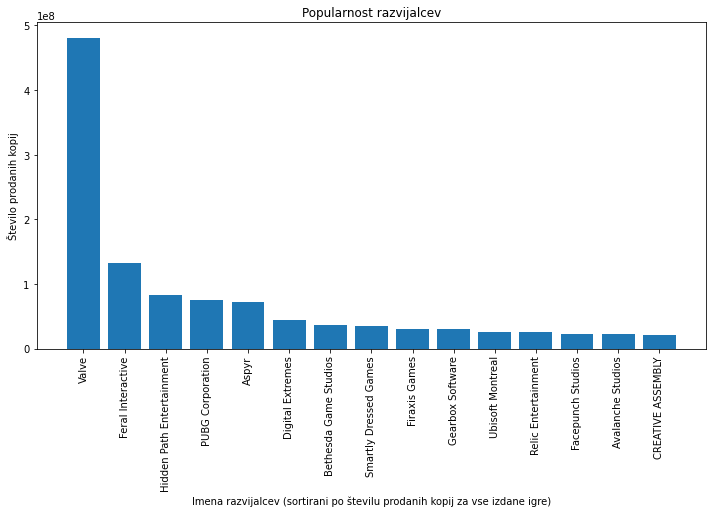

In [8]:
owners = []
games = []
for v in devels.values():
    owners.append(v[0])
    games.append(v[1])

plt.figure(figsize=(12,6),facecolor="w")
plt.bar(devels.keys(),owners)
plt.xticks(range(len(devels.keys())), devels.keys(), rotation=90)
plt.xlabel("Imena razvijalcev (sortirani po številu prodanih kopij za vse izdane igre)")
plt.ylabel("Število prodanih kopij")
plt.title("Popularnost razvijalcev")

`Iz zgornjih grafov lahko presodimo, da populacija developerja ni odvisna od števila izdanih iger in če je igra brezplačna ali plačilna. Npr.: PUBG Corporation in Smartly Dressed Games imata izdano samo po eno igro,pri tem, da je eno potrebno kupiti, druga pa brezplačna in sta še vedno v top 10 developerjev. Feral Interactive pa v številu iger zelo odstopa od drugih developerjev zaradi tega, ker sodelujejo z drugi developerji in spremenijo platformo npr.:(Linux, MacOs, iOS, Android) igre, ki so izdane s strani drugega developerja in v tem je smisel za tako veliko število "izdanih" iger.`

`Glede na populacijo je developer Valve v ogromni prednosti pred drugimi developerji. Namreč podatkovna baza pripada Steam spletni trgovini, kar pa pripada developerju Valve. Obstajajo tudi druge spletne trgovine, ampak niso tako velike kot Steam, se pravi tudi če je Steam v lastništvu Valve nam ta podatek ne uniči dejstva zakaj je Valve tako uspešen developer.`

### Spodnja funkcija izbriše in doda potrebne atribute v tabelo steam

In [9]:
#----------------------------POPRAVLJANE TEBELE STEAM----------------------------
def buildSteamDataframe(originalDataFrame):
    mySteam = originalDataFrame.copy()
    #Rating -> pistive r / all r
    mySteam["rating"] = mySteam["positive_ratings"]/(mySteam["positive_ratings"]+mySteam["negative_ratings"])
    mySteam["reviews"] = (mySteam["positive_ratings"]+mySteam["negative_ratings"])
    #Razdelitev leta na leto in mesec (dan zbrišemo)
    mySteam[["release_year","release_month","release_day"]] = mySteam.release_date.str.split("-",expand=True,)
    #owners -> (min own. + max own) /2
    mySteam["owners"] = [ pd.to_numeric((pd.to_numeric(row["owners"].split("-")[0]) + pd.to_numeric(row["owners"].split("-")[1]))//2)  for index, row in mySteam.iterrows()]
    #delete nepotrebne podatke
    mySteam = mySteam.drop(columns=["release_date","release_day","required_age","achievements","positive_ratings","negative_ratings","english"])
    return mySteam

### Funkcija filtrira tabelo po atributih ki vsebuje vpisano vrednost. Funkcija vrača novo tabelo

In [10]:
#----------------------------MATRIKA Z DOLOČENIMI VREDNOSTMI----------------------------
#atribut->atribut v tabeli; value->vrednost, ki jo vrednost mora vsebovati; OGDateFrame->originalna tabela
def getDataFrameFor(atribut, value, OGDataFrame):
    #če atribut obstaja gremo naprej
    myGroups = []
    if( atribut in list(OGDataFrame)):
        groups = OGDataFrame.groupby([atribut]).groups
        for key in groups.keys():
            if(key.find(value) >= 0):
                myGroups.append(key)
        if(len(myGroups) > 0):
            matrix = pd.concat([OGDataFrame.loc[groups[myGroups[i]],] for i in range(len(myGroups))], ignore_index=True)
            return matrix
    return null     

In [26]:
mySteam.head()

,appid,name,developer,publisher,platforms,categories,genres,steamspy_tags,average_playtime,median_playtime,owners,price,rating,reviews,release_year,release_month
0,10,Counter-Strike,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,17612,317,15000000,7.19,0.973888,127873,2000,11
1,20,Team Fortress Classic,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,277,62,7500000,3.99,0.839787,3951,1999,04
2,30,Day of Defeat,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,187,34,7500000,3.99,0.895648,3814,2003,05
3,40,Deathmatch Classic,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,258,184,7500000,3.99,0.826623,1540,2001,06
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,624,415,7500000,3.99,0.947996,5538,1999,11


## Iskanje korelacije med atributi v tabeli steam

In [12]:
from sklearn import preprocessing

In [13]:
#Pretvorimo vse ne številčne vrednosti v številke
corrSteam = buildSteamDataframe(steam)
corrSteam = corrSteam.drop(columns=["appid","release_year","release_month"])
le = preprocessing.LabelEncoder()
corrSteam.name=le.fit_transform(corrSteam.name)
corrSteam.developer=le.fit_transform(corrSteam.developer)
corrSteam.publisher=le.fit_transform(corrSteam.publisher)
corrSteam.platforms=le.fit_transform(corrSteam.platforms)
corrSteam.genres=le.fit_transform(corrSteam.genres)
corrSteam.categories=le.fit_transform(corrSteam.categories)
corrSteam.steamspy_tags=le.fit_transform(corrSteam.steamspy_tags)

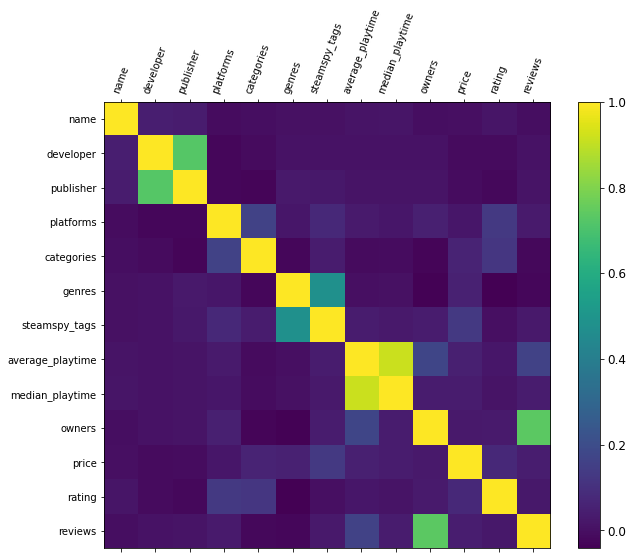

In [14]:
#Predstavimo correlacijsko matriko v barvah
f = plt.figure(figsize=(10, 8),facecolor="w")
plt.matshow(corrSteam.corr(), fignum=f.number)
plt.xticks(range(corrSteam.shape[1]), corrSteam.columns, fontsize=10, rotation=70)
plt.yticks(range(corrSteam.shape[1]), corrSteam.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)

```Kot vidimo iz slike je korelacija med atributi zelo slaba. Večje korelacije so med avg_playtime - median_playtime in developer - publisher, kar je smisleno. Owners (št. prodanih kopij) in reviews (št. kritik) sta tudi v močni korelaciji saj z večjo število ljudi, ki je kupilo igrico raste tudi število kritik.```

## Napovedovanje število kupcev

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, accuracy_score

In [16]:
corrSteam = corrSteam[corrSteam.reviews > 10000]
X=corrSteam.loc[:, corrSteam.columns != 'owners']
y=corrSteam.owners
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

model = LinearRegression(fit_intercept=True, normalize=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Linear regression MSE: ",mean_squared_error(y_test, y_pred))


model = Ridge(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Ridge MSE: ",mean_squared_error(y_test, y_pred))

model = DecisionTreeRegressor( max_depth=None)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Decision Tree MSE: ",mean_squared_error(y_test, y_pred))

Linear regression MSE:  115678516994170.81
Ridge MSE:  115681780778360.02
Decision Tree MSE:  162552986577181.22


```Iz rezultatov opažamo da število kupcev ne bomo mogli napovedat.```

## Napovedovanje žanrov

``` Glede na prejšnji žalosten rezultat bom poskusil napovedati žanr igre. Imam malo upanja da bojo rezultati kaj boljši, saj iz korelacijske tabele je razvidno, da sta genre in steamspy_tags v neki korelaciji.```

In [17]:
X=corrSteam.loc[:, corrSteam.columns != 'genres']
y=corrSteam.genres
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred, digits=5))
print("Natančnost: ",accuracy_score(y_test,y_pred))

Natančnost:  0.11409395973154363


In [18]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=None)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred, digits=5))
print("Natančnost: ",accuracy_score(y_test,y_pred))

Natančnost:  0.10067114093959731


```Uporaba K sosedov je privedla do 10% natančnosti. Drevo pa je doseglo 47% natančnost. Rezultati definitivno niso visoki, ampak nismo upoštevali ene stvari:```

In [19]:
print("Število vseh žanrov je %4d, zato ne moremo biti preveč optimistični, da bojo rezultati dobri."%(mySteam.genres.nunique()))

Število vseh žanrov je 1552, zato ne moremo biti preveč optimistični, da bojo rezultati dobri.


### ----------------------------------------DODAJ (napovedovanje) ČE IMA KDO ŠE KAJ----------------------------------------

In [20]:
#funkcija za izris barplota skozi čas >2005 (od 2006 naprej je veliko podatkov; <2005 je par igric kar ni dovolj)
def getPlotOverY(atribute, value, dataFrame, xlabel, ylabel1, ylabel2, title):
    matrika = getDataFrameFor(atribute, value, dataFrame)
    #[appid] -> vseen kera vrstica, važno je, da dobim prave vrednosti
    valueA = matrika.groupby(["release_year"])["appid"].count()
    allA = dataFrame.groupby(["release_year"])["appid"].count()

    keys1 = [k for k in allA.keys() if pd.to_numeric(k)>2005]
    valuesA1 = []
    for k in allA.keys():
        if (pd.to_numeric(k)>2005):
            if(k in valueA.keys()):
                valuesA1.append(pd.to_numeric(valueA[k]))
            else:
                valuesA1.append(0)
    valuesA2 = [pd.to_numeric(allA[k]) for k in allA.keys() if pd.to_numeric(k)>2005]

    values = [pd.to_numeric(pd.to_numeric(valueA[k])/pd.to_numeric(allA[k])*100) for k in valueA.keys() if pd.to_numeric(k)>2005]
    keys = [k for k in valueA.keys() if pd.to_numeric(k)>2005]

    plt.figure(figsize=(18,6),facecolor="w")
    plt.suptitle(title)
    plt.subplot(121)
    plt.bar(np.arange(len(keys1))-0.2, valuesA1, width=0.4, color="tab:blue", alpha=0.6, align="center", label=value+" igre")
    plt.bar(np.arange(len(keys1))+0.2, valuesA2, width=0.4,color="tab:blue", align="center", label="Vse igre")
    plt.xticks(range(len(keys1)), keys1, rotation=90)
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel1)
        
    plt.subplot(122)
    plt.bar(keys,values)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel2)

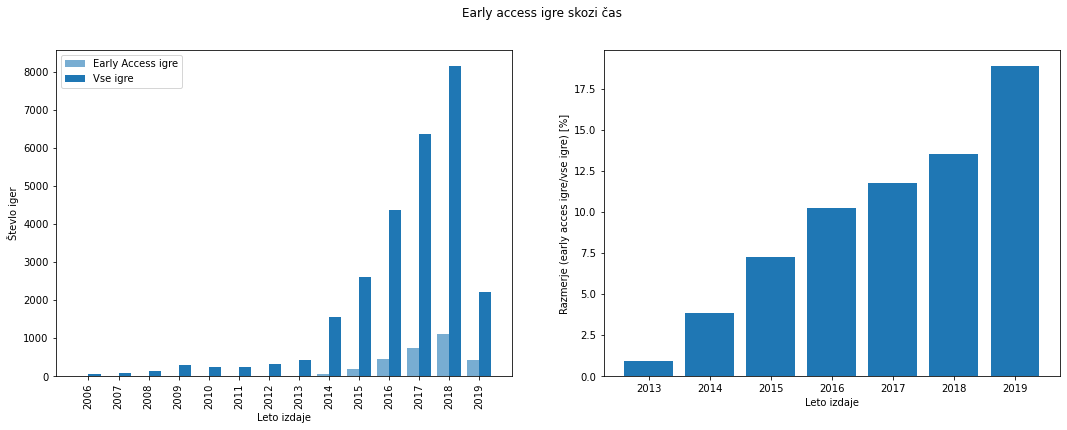

In [21]:
getPlotOverY("steamspy_tags", "Early Access", mySteam, "Leto izdaje", "Števlo iger","Razmerje (early acces igre/vse igre) [%]", "Early access igre skozi čas")

```V zadnjih parih let je early access zelo popularen med publisherji, saj na tak način lahko primamijo veliko število kupcev.```

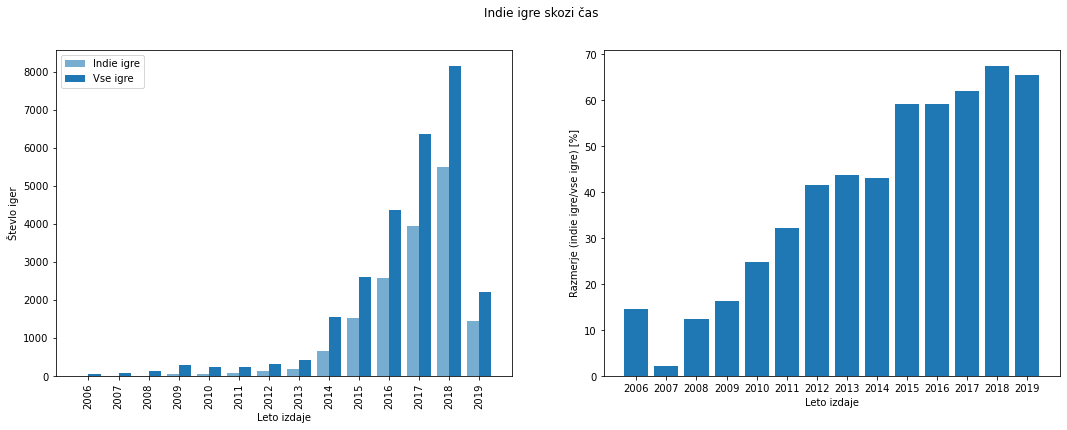

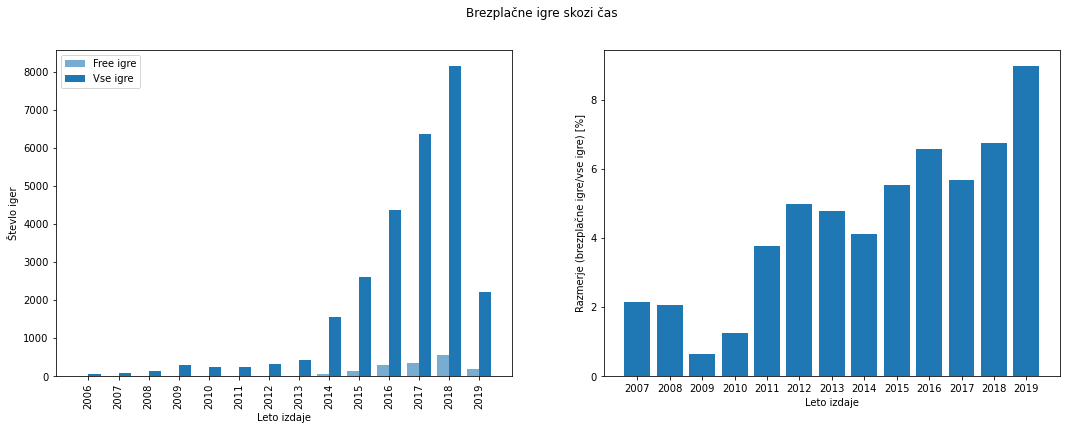

In [22]:
getPlotOverY("steamspy_tags", "Indie", mySteam, "Leto izdaje", "Števlo iger", "Razmerje (indie igre/vse igre) [%]", "Indie igre skozi čas")
getPlotOverY("steamspy_tags", "Free", mySteam, "Leto izdaje", "Števlo iger","Razmerje (brezplačne igre/vse igre) [%]", "Brezplačne igre skozi čas")

```Skozi čas opažamo, da je rast Indie igric drastičen (v zadnjih 10 letih skor 60%). Namreč kjer živimo v času ko je tehnologija zelo razvita se razvija tudi način izdelave igric. Zato tudi Indie igrice ratujejo precej dobre in njihovo število vedno rast.```

## Porazdelitve

In [23]:
mySteam.head()

,appid,name,developer,publisher,platforms,categories,genres,steamspy_tags,average_playtime,median_playtime,owners,price,rating,reviews,release_year,release_month
0,10,Counter-Strike,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,17612,317,15000000,7.19,0.973888,127873,2000,11
1,20,Team Fortress Classic,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,277,62,7500000,3.99,0.839787,3951,1999,04
2,30,Day of Defeat,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,187,34,7500000,3.99,0.895648,3814,2003,05
3,40,Deathmatch Classic,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,258,184,7500000,3.99,0.826623,1540,2001,06
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,624,415,7500000,3.99,0.947996,5538,1999,11


(array([  9.,   6.,   9.,  10.,  14.,  26.,  23.,  28.,  34.,  47.,  38.,
         52.,  70.,  74.,  99., 100., 117., 130., 105., 150., 163., 171.,
        218., 221., 267., 308., 359., 345., 407., 421., 473., 487., 516.,
        535., 583., 557., 557., 519., 386., 100.]),
 array([0.12258065, 0.14451613, 0.16645161, 0.1883871 , 0.21032258,
        0.23225806, 0.25419355, 0.27612903, 0.29806452, 0.32      ,
        0.34193548, 0.36387097, 0.38580645, 0.40774194, 0.42967742,
        0.4516129 , 0.47354839, 0.49548387, 0.51741935, 0.53935484,
        0.56129032, 0.58322581, 0.60516129, 0.62709677, 0.64903226,
        0.67096774, 0.69290323, 0.71483871, 0.73677419, 0.75870968,
        0.78064516, 0.80258065, 0.82451613, 0.84645161, 0.8683871 ,
        0.89032258, 0.91225806, 0.93419355, 0.95612903, 0.97806452,
        1.        ]),
 <a list of 40 Patch objects>)

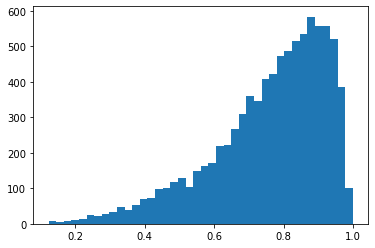

In [24]:
from scipy.stats import beta
sample = beta.rvs(a, b, size=n) 
parameters = beta.fit(sample)
P_fit = [beta.pdf(x, *parameters) for x in xr ]
plt.hist(mySteam[mySteam.reviews > 100].rating, bins=40)